In [1]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *

In [0]:
bs = 64

In [0]:
folder = 'ripe'
file = 'urls_ripe.csv'

In [0]:
folder = 'rotten'
file = 'urls_rotten.csv'

In [0]:
path = Path(base_dir + 'data/fruits')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/ripe'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/rotten'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/fruits/models')]

In [0]:
classes = ['rotten', 'ripe']

In [0]:
download_images(dest/file, dest, max_pics=500, max_workers=0)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:
data.classes


['ripe', 'rotten']

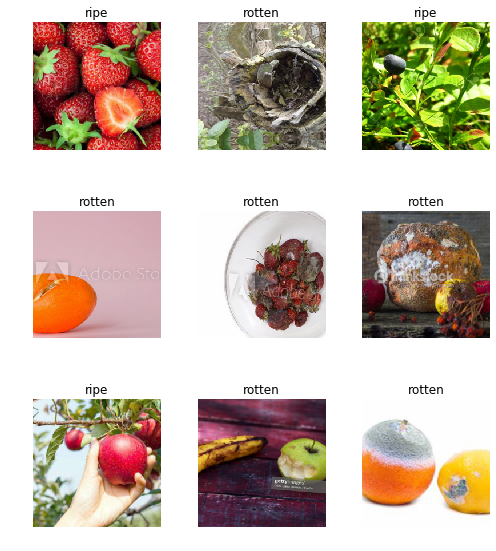

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
error_rate??

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [55]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ripe', 'rotten'], 2, 576, 144)

In [56]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.717387,0.424872,0.222222,00:12
1,0.551425,0.310956,0.104167,00:12
2,0.446381,0.313293,0.097222,00:12


In [0]:
learn.save('stage-3')

In [0]:
learn.unfreeze()

In [59]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


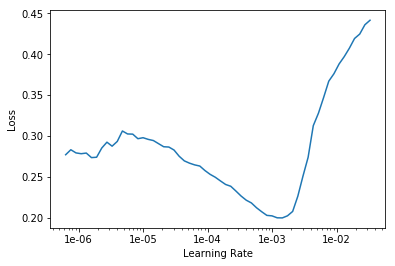

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.301899,0.363760,0.104167,00:13
1,0.209127,0.349176,0.097222,00:13


In [0]:
learn.save('stage-4');

In [0]:
learn.load('stage-4');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

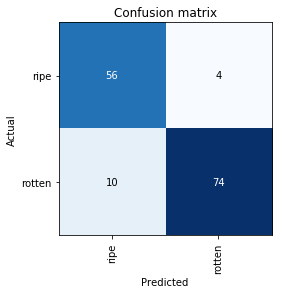

In [65]:
interp.plot_confusion_matrix()